<a href="https://colab.research.google.com/github/Sikandarh11/Machine-Learning-Projects/blob/main/Keras%20Tunner%20ANN(heart_disease_prediction).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d rishidamarla/heart-disease-prediction

Dataset URL: https://www.kaggle.com/datasets/rishidamarla/heart-disease-prediction
License(s): CC0-1.0
  0% 0.00/3.41k [00:00<?, ?B/s]
100% 3.41k/3.41k [00:00<00:00, 10.1MB/s]


In [3]:
import zipfile
zip_data = zipfile.ZipFile('/content/heart-disease-prediction.zip')
zip_data.extractall('\content')
zip_data.close()

In [4]:
import numpy as np
import pandas as pd
df = pd.read_csv('/content/\content/Heart_Disease_Prediction.csv')

In [5]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [6]:
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

# **Label Encoding the Target Column the Data**

In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Heart Disease'] = encoder.fit_transform(df['Heart Disease'])

In [11]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


# **Normalizing the Data using Standard Scaler**

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
newdf = scaler.fit_transform(df.drop('Heart Disease', axis=1))

In [13]:
newdf.shape

(270, 13)

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(newdf, df['Heart Disease'], test_size = 0.2,random_state=1)

In [76]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((216, 13), (54, 13), (216,), (54,))

In [16]:
import tensorflow
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# **Early Stopping**

In [77]:
from tensorflow.keras.callbacks import EarlyStopping
callback = EarlyStopping(
    monitor = "val_loss",
    min_delta = 0.00001,
    patience = 20,
    verbose = 1,
    mode='auto',
    baseline = None,
    restore_best_weights = None
)

# **Model with regularization and without Hyperparameter Tunning**

In [78]:
model = Sequential()
model.add(Dense(32, input_shape=(13,), activation = 'relu', kernel_regularizer = tensorflow.keras.regularizers.l2(.001)))
model.add(Dropout(0.5))
model.add(Dense(16, input_shape=(13,), activation = 'relu', kernel_regularizer = tensorflow.keras.regularizers.l2(.001)))
model.add(Dropout(0.5))
model.add(Dense(16, input_shape=(13,), activation = 'relu', kernel_regularizer = tensorflow.keras.regularizers.l2(.001)))
model.add(Dropout(0.5))
model.add(Dense(8, input_shape=(13,), activation = 'relu', kernel_regularizer = tensorflow.keras.regularizers.l2(.001)))
model.add(Dense(1, activation = 'sigmoid'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                448       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                272       
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 8)                 1

In [79]:
adam = Adam(learning_rate =0.01)
model.compile(optimizer = adam, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [80]:
history = model.fit(X_train , y_train, epochs=500, validation_split = 0.2, verbose=1, callbacks = callback, validation_data=(X_test, y_test))

Epoch 1/500
7/7 [==============================] - 2s 37ms/step - loss: 0.8535 - accuracy: 0.5231 - val_loss: 0.7551 - val_accuracy: 0.5000
Epoch 2/500
7/7 [==============================] - 0s 8ms/step - loss: 0.7463 - accuracy: 0.5417 - val_loss: 0.7427 - val_accuracy: 0.5926
Epoch 3/500
7/7 [==============================] - 0s 9ms/step - loss: 0.7113 - accuracy: 0.6157 - val_loss: 0.6918 - val_accuracy: 0.7593
Epoch 4/500
7/7 [==============================] - 0s 11ms/step - loss: 0.7189 - accuracy: 0.5926 - val_loss: 0.6469 - val_accuracy: 0.7963
Epoch 5/500
7/7 [==============================] - 0s 9ms/step - loss: 0.6896 - accuracy: 0.6157 - val_loss: 0.6321 - val_accuracy: 0.7778
Epoch 6/500
7/7 [==============================] - 0s 8ms/step - loss: 0.6788 - accuracy: 0.6204 - val_loss: 0.6474 - val_accuracy: 0.7778
Epoch 7/500
7/7 [==============================] - 0s 11ms/step - loss: 0.6477 - accuracy: 0.6713 - val_loss: 0.6266 - val_accuracy: 0.7593
Epoch 8/500
7/7 [=======

# **The early stopping comes out to be 85 epochs.**
# **1. Validation Accuracy = 83.33%**
# **2. Accuracy = 88%**

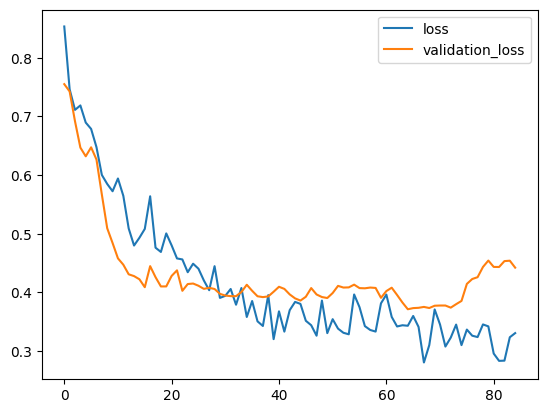

In [81]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'validation_loss')
plt.legend()
plt.show()

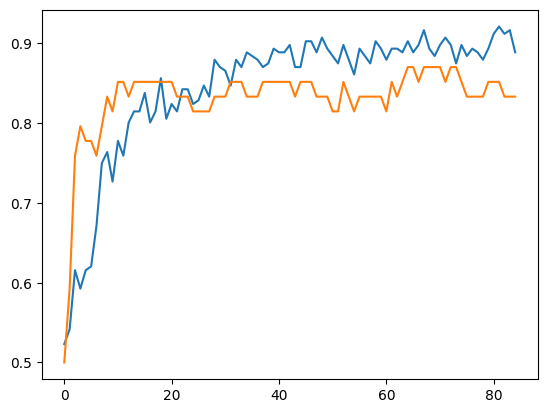

In [82]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

In [27]:
pip install -U keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.5 MB/s eta 0:00:00


# **Hyperparameter Tunning**

1. Finding the best Optimizer
2. Finding best no of nodes
3. Finding best no of layers

In [28]:
import kerastuner as kt

<ipython-input-28-5fd8096cdee5>:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


**1. Finding the best optimizer**

In [25]:
def build_model(hp):
  model = Sequential()
  model.add(Dense(32, input_shape=(13,), activation = 'relu', kernel_regularizer = tensorflow.keras.regularizers.l2(.001)))
  model.add(Dense(16, input_shape=(13,), activation = 'relu', kernel_regularizer = tensorflow.keras.regularizers.l2(.001)))
  model.add(Dense(16, input_shape=(13,), activation = 'relu', kernel_regularizer = tensorflow.keras.regularizers.l2(.001)))
  model.add(Dense(8, input_shape=(13,), activation = 'relu', kernel_regularizer = tensorflow.keras.regularizers.l2(.001)))
  model.add(Dense(1, activation = 'sigmoid'))
  optimizers=hp.Choice("optimizer", values=['adam', 'sgd', 'rmsprop', 'adadelta'])
  model.compile(optimizer=optimizers, loss='binary_crossentropy', metrics=['accuracy'])
  return model

In [83]:
tuner =kt.RandomSearch(
    build_model,
    objective="val_accuracy",
    max_trials =5
)

Reloading Tuner from ./untitled_project/tuner0.json


In [84]:
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

In [85]:
tuner.get_best_hyperparameters()[0].values

{'optimizer': 'adam'}

# Since it shows that the best optimizer in this case is **Adam**

In [51]:
import shutil
shutil.rmtree('project2/optimizer', ignore_errors=True)  # Clear previous tuner results

# **2. Finding the best no of nodes in each**

In [87]:
def build_model(hp):
    model = Sequential()
    units = hp.Int("units", min_value=8, max_value=128, step=8)
    model.add(Dense(units=units, input_shape=(13,), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
    model.add(Dense(units=units, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
    model.add(Dense(units=units, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    directory='my_dir/units',
    project_name='tuner'
)

tuner.search(
    X_train, y_train, epochs=5, validation_data=(X_test, y_test)
)

best_hp = tuner.get_best_hyperparameters()[0]
best_units = best_hp.get('units')
print(f"Optimal number of units: {best_units}")


Reloading Tuner from my_dir/units/tuner/tuner0.json
Optimal number of units: 64


# **3. Finding the best no of Layers**

In [88]:
def build_model(hp):
    model = Sequential()
    model.add(Dense(units=64, input_shape=(13,), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
    for i in range(hp.Int("num_of_layers", min_value=1, max_value=5)):
      model.add(Dense(units=32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model


In [89]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    directory='my_dir/no_of_layers',
    project_name='tuner'
)

tuner.search(
    X_train, y_train, epochs=5, validation_data=(X_test, y_test)
)

best_hp = tuner.get_best_hyperparameters()[0]
best_num_of_layers = best_hp.get('num_of_layers')
print(f"Optimal number of layers: {best_num_of_layers}")


Reloading Tuner from my_dir/no_of_layers/tuner/tuner0.json
Optimal number of layers: 4


**So the best number of layers with 32 units is 4.**

So we have finded the best optimizer, # layers and # units in each layer

1. Best Optimizer = Adam
2. Best no of Layers = 5 (1 + 4)
3. Best no of nodes in each layer = 32 x 4 + 1 x 64

In [113]:
model = Sequential()
model.add(Dense(64, input_shape=(13,), activation = 'relu', kernel_regularizer = tensorflow.keras.regularizers.l2(.001)))
model.add(Dense(32, activation = 'relu', kernel_regularizer = tensorflow.keras.regularizers.l2(.001)))
model.add(Dropout(0.5))
model.add(Dense(32, activation = 'relu', kernel_regularizer = tensorflow.keras.regularizers.l2(.001)))
model.add(Dropout(0.5))
model.add(Dense(32, activation = 'relu', kernel_regularizer = tensorflow.keras.regularizers.l2(.001)))
model.add(Dropout(0.5))
model.add(Dense(32, activation = 'relu', kernel_regularizer = tensorflow.keras.regularizers.l2(.001)))
model.add(Dense(1, activation = 'sigmoid'))

In [114]:
model.compile(
    optimizer = "adam",
    loss = "binary_crossentropy",
    metrics = ['accuracy']
)

In [111]:
callback = EarlyStopping(
    monitor = "val_loss",
    min_delta = 0.00001,
    patience = 20,
    verbose = 1,
    mode='auto',
    baseline = None,
    restore_best_weights = None
)

In [115]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), callbacks=callback)

Epoch 1/100
7/7 [==============================] - 2s 41ms/step - loss: 0.9013 - accuracy: 0.4259 - val_loss: 0.8460 - val_accuracy: 0.4630
Epoch 2/100
7/7 [==============================] - 0s 8ms/step - loss: 0.8694 - accuracy: 0.5185 - val_loss: 0.8349 - val_accuracy: 0.6667
Epoch 3/100
7/7 [==============================] - 0s 11ms/step - loss: 0.8372 - accuracy: 0.5278 - val_loss: 0.8274 - val_accuracy: 0.7037
Epoch 4/100
7/7 [==============================] - 0s 11ms/step - loss: 0.8286 - accuracy: 0.5417 - val_loss: 0.8208 - val_accuracy: 0.6852
Epoch 5/100
7/7 [==============================] - 0s 11ms/step - loss: 0.8261 - accuracy: 0.6204 - val_loss: 0.8124 - val_accuracy: 0.7222
Epoch 6/100
7/7 [==============================] - 0s 12ms/step - loss: 0.8221 - accuracy: 0.6250 - val_loss: 0.8020 - val_accuracy: 0.7407
Epoch 7/100
7/7 [==============================] - 0s 11ms/step - loss: 0.8092 - accuracy: 0.6759 - val_loss: 0.7877 - val_accuracy: 0.7407
Epoch 8/100
7/7 [====

# **So after the best hyperparameter tunning we got better results**
# **1. New Validation Accuracy = 88.89%**
# **2. New Accuracy = 90.74%**

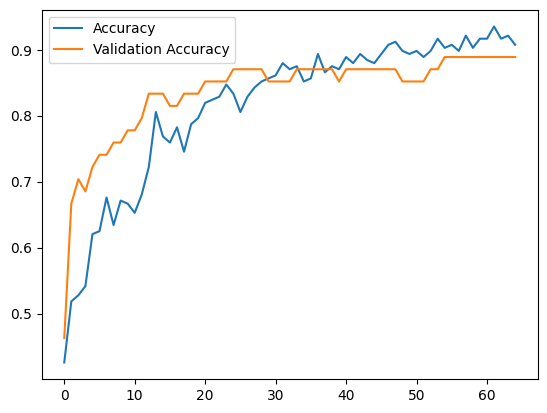

In [118]:
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.legend()
plt.show()

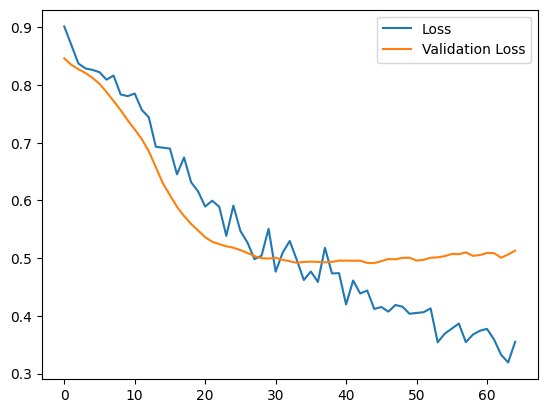

In [119]:
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.legend()
plt.show()

In [121]:
import pickle
pickle.dump(model, open("heart_disease_pred_model.pkl", "wb"))